# Using local storage as audio cache

In [1]:
# Login
from omapy.api import oma

# API endpoint
url = "http://localhost:8080/"
# Login with username, password and flag that indicates if certificates are validated or not. False: useful for non-production
login = oma.login(url, "oma", "=PSe?sZ-ymp6mE>2", False)
# response code 200
print(login)

<Response [200]>


In [2]:
directory = ".omacache"

recording_id = 25161

filename = directory + "/" + str(recording_id) + ".wav"

file = open(filename,"w")


In [3]:
params = {"recording": recording_id}

recording = oma.recording_get(params)

print(recording)

{'digitalAudio': [{'id': 25162}], 'title': 'Recording of 1975', 'beats': None, 'id': 25161, 'interpretation': {'id': 5909}, 'tenantId': 3, 'abstractMusicPart': {'id': 5910}, 'annotationSessions': [{'id': 92520}, {'id': 92146}, {'id': 93272}, {'id': 92898}], 'recordingData': {}}


In [4]:
params = {"recording": 25161}

audio_file = oma.recording_get_audio(params)

print(audio_file.name)




opened
omacache/recording/25161.mp3


In [5]:
import librosa

y, sr = librosa.load(audio_file.name, sr=44100, mono=False)

/home/martin/Workspace/oma/jupyter/JUPYTER/lib/python3.5/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Text(0.5, 1.0, 'Stereo Wave')

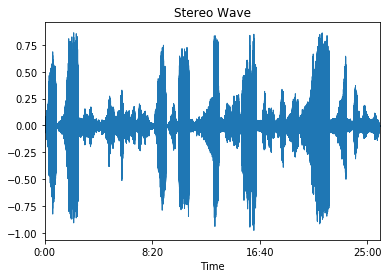

In [7]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure()
plt.subplot(1, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo Wave')
